In [1]:
from scipy import stats

import numpy as np
import GPy
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'
from pylab import *


Scipy stats toolbox http://docs.scipy.org/doc/scipy-0.15.1/reference/stats.html 
GPy regression tutorial https://github.com/SheffieldML/GPy/blob/master/doc/tuto_GP_regression.rst
    tutorial worksheet http://ml.dcs.shef.ac.uk/gpss/gpss13/labs/lab1.pdf 
    http://gpy.readthedocs.org/en/latest/_modules/GPy/examples/regression.html
    
GPy tutorials http://nbviewer.ipython.org/github/SheffieldML/notebook/blob/master/GPy/index.ipynb 
Overview page https://sheffieldml.github.io/GPy/ 
Documentation http://pythonhosted.org/GPy/ 

For this notebook, heavily borrowed from for the GPy code http://nbviewer.ipython.org/github/SheffieldML/notebook/blob/master/GPy/sampling_hmc.ipynb


In [2]:
# Generate data
N=100;
X = np.linspace(0,1,N)
# SANTNER ET AL. (2003) DAMPED COSINE FUNCTION
Y = np.exp(-1.4*X) * np.cos(((X>0.4)*3.5+(X<=0.4)*10.0)*(np.pi*X)) 
#Xt = X.reshape((X.shape[0],1))
#Yt = Y.reshape((Y.shape[0],1))

0.00187509036937 0.0602465658683


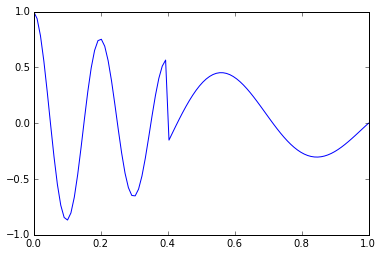

In [3]:
plt.plot(X,Y)
np.shape(X)
np.version.version
bla = np.random.rand(5,3)
xx=bla.var(0)
print xx.var(), bla.var()

In [10]:
# Fit global GP
gg = GPy.models.GPRegression(X[:,None],Y[:,None])
gg.kern.lengthscale.set_prior(GPy.priors.Gamma(1.,1.))
gg.kern.variance.set_prior(GPy.priors.Gamma(1.,1.))
gg.likelihood.variance.set_prior(GPy.priors.Gamma(1.,1.))
hmc = GPy.inference.mcmc.HMC(gg,stepsize=5e-2)
sHMCSamples = hmc.sample(num_samples=600)

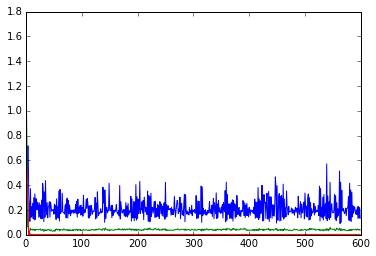

In [11]:
plot(sHMCSamples)

In [12]:
sHMCSamples[0:9,1:]


array([[  1.62611151e+00,   6.74764116e-01],
       [  1.00587798e+00,   5.48149403e-01],
       [  6.41428768e-01,   5.05920769e-01],
       [  6.50310520e-02,   2.71161154e-01],
       [  6.50310520e-02,   2.71161154e-01],
       [  1.21833594e-02,   1.97549706e-04],
       [  3.23633039e-02,   3.07337724e-02],
       [  3.31426374e-02,   2.04420724e-03],
       [  5.32285163e-02,   4.10227372e-03]])


Name                              : GP regression
Log-likelihood                    : 78.2004455679
Number of Parameters              : 3
Number of Optimization Parameters : 3
Updates                           : True
Parameters:
  GP_regression.           |       Value        |  Constraint  |   Prior    |  Tied to
  rbf.variance             |     0.21559209604  |     +ve      |  Ga(1, 1)  |         
  rbf.lengthscale          |   0.0462906104596  |     +ve      |  Ga(1, 1)  |         
  Gaussian_noise.variance  |  0.00670527018357  |     +ve      |  Ga(1, 1)  |         


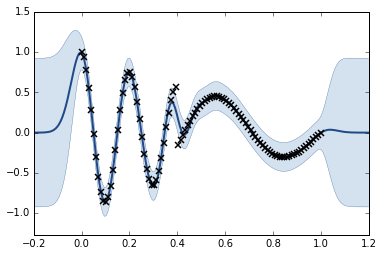

In [13]:
# Plot GP
# Set the model parameters as the posterior mean to visualise
gg.kern.variance[:] = sHMCSamples[:,0].mean()
gg.kern.lengthscale[:] = sHMCSamples[:,1].mean()
gg.likelihood.variance[:] = sHMCSamples[:,2].mean()
print gg
_=gg.plot()

In [14]:
Xpred = X[:,None]+0.5/N
Ypred = gg.predict(Xpred)


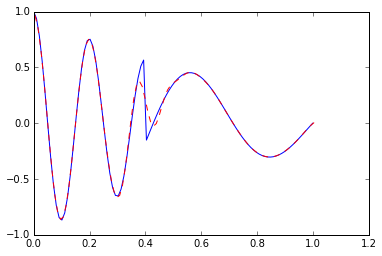

In [15]:
# Do prediction
plt.plot(X,Y,'-b')
plt.plot(Xpred,Ypred[0],'--r')
